# Introduction

Notebook to aggregate the running of models in the context of traceability between features and bug reports.

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from modules.models_runner.tc_br_runner import TC_BR_Runner

import warnings; warnings.simplefilter('ignore')

# Run All Models

In [2]:
runner = TC_BR_Runner()

lsi_model, lsi_eval = runner.run_lsi_model()
lda_model, lda_eval = runner.run_lda_model()
bm25_model, bm25_eval = runner.run_bm25_model()
w2v_model, w2v_eval = runner.run_word2vec_model()

TestCases.shape: (207, 12)
SelectedBugReports2.shape: (93, 22)
OracleExpertVolunteers.shape: (207, 93)

Model Evaluation -------------------------------------------
{'Measures': {'Mean FScore of LSI_Model_TC_BR': 0.0030721966205837174,
              'Mean Precision of LSI_Model_TC_BR': 0.010752688172043012,
              'Mean Recall of LSI_Model_TC_BR': 0.0017921146953405018},
 'Setup': [{'Name': 'LSI_Model_TC_BR'},
           {'Similarity Measure and Minimum Threshold': ('cosine', 0.8)},
           {'Top Value': 100},
           {'SVD Model': {'algorithm': 'randomized',
                          'n_components': 100,
                          'n_iter': 10,
                          'random_state': 42,
                          'tol': 0.0}},
           {'Vectorizer': {'analyzer': 'word',
                           'binary': False,
                           'decode_error': 'strict',
                           'dtype': <class 'numpy.float64'>,
                           'encoding': 'utf

# Results

In [3]:
results = pd.DataFrame(columns=['model','precision','recall','fscore'])

results['model'] = [lsi_model.get_name(), 
                    lda_model.get_name(), 
                    bm25_model.get_name(), 
                    w2v_model.get_name()]

results['precision'] = [lsi_eval.get_mean_precision(), 
                        lda_eval.get_mean_precision(), 
                        bm25_eval.get_mean_precision(), 
                        w2v_eval.get_mean_precision()]

results['recall'] = [lsi_eval.get_mean_recall(),
                     lda_eval.get_mean_recall(),
                     bm25_eval.get_mean_recall(),
                     w2v_eval.get_mean_recall()]

results['fscore'] = [lsi_eval.get_mean_fscore(),
                     lda_eval.get_mean_fscore(),
                     bm25_eval.get_mean_fscore(),
                     w2v_eval.get_mean_fscore()]

results['precision_perc'] = results.precision.apply(lambda x : 100 * x)
results['recall_perc'] = results.recall.apply(lambda x : 100 * x)
results['fscore_perc'] = results.fscore.apply(lambda x : 100 * x)

results.head()

,model,precision,recall,fscore,precision_perc,recall_perc,fscore_perc
0,LSI_Model_TC_BR,0.010753,0.001792,0.003072,1.075269,0.179211,0.307220
1,LDA_Model_TC_BR,0.037442,0.370681,0.067111,3.744196,37.068075,6.711139
2,BM25_Model_TC_BR,0.030804,0.419355,0.056813,3.080359,41.935484,5.681253
3,WordVec_Model_AllData,0.027823,0.345040,0.050744,2.782326,34.504034,5.074414


# Plots

## Precision

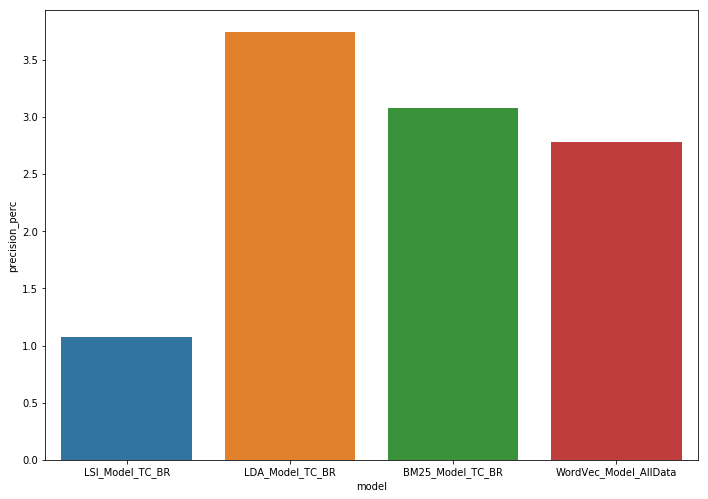

In [4]:
dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=dims)
sns.barplot(ax=ax, x='model', y='precision_perc', data=results)

## Recall

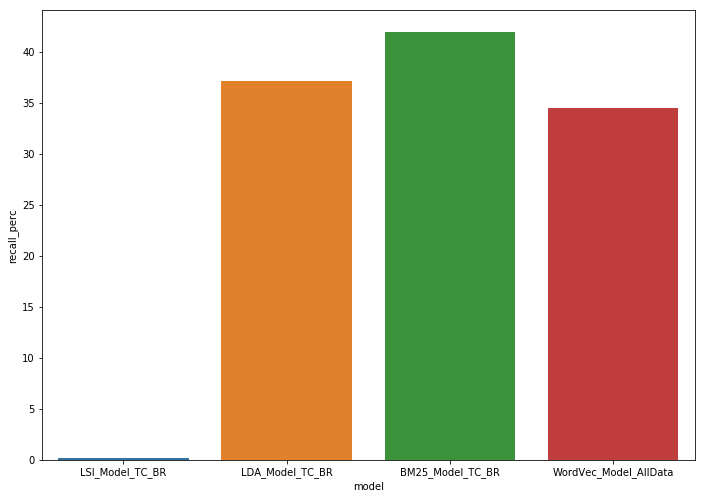

In [5]:
dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=dims)
sns.barplot(ax=ax, x='model', y='recall_perc', data=results)

## F-Score

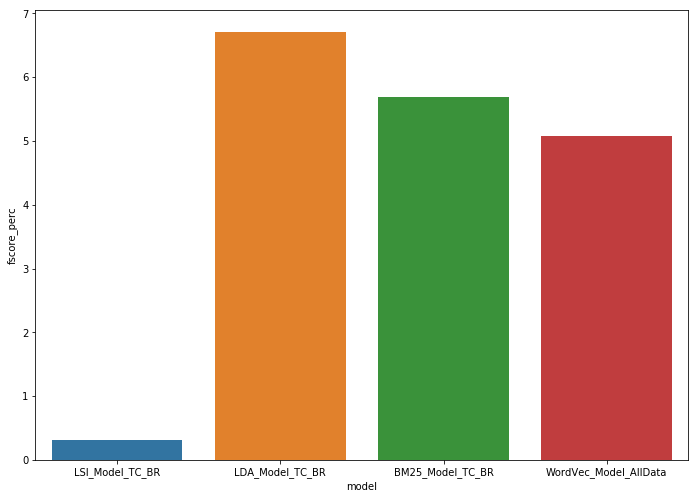

In [6]:
dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=dims)
sns.barplot(ax=ax, x='model', y='fscore_perc', data=results)